# Handling Missing Value using CCA concept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("D:\ITM\ML_Dataset\data_science_job.csv")

In [3]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:

cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [8]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [9]:
df_new=df[cols].dropna()
df_new.shape, df.shape

((17182, 5), (19158, 13))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

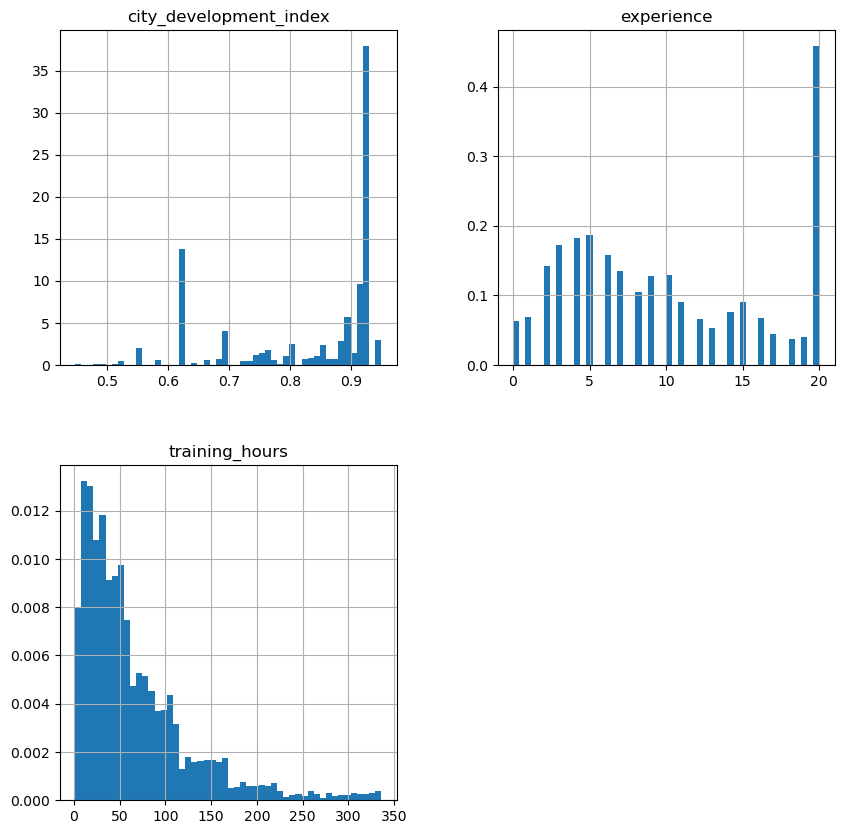

In [10]:
df_new.hist(bins=50, density=True, figsize=(10,10))

<Axes: >

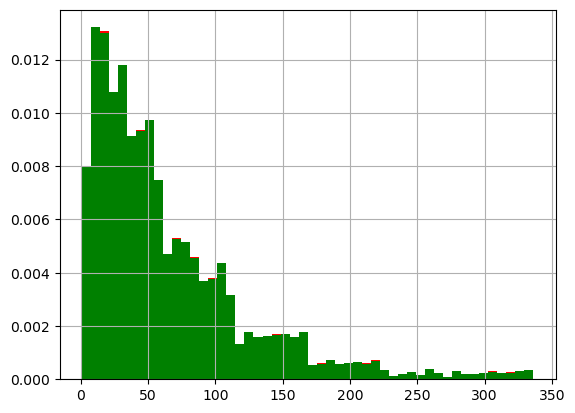

In [11]:
df['training_hours'].hist(bins=50, density=True, color='red')
df_new['training_hours'].hist(bins=50, density=True, color='green')


<Axes: ylabel='Density'>

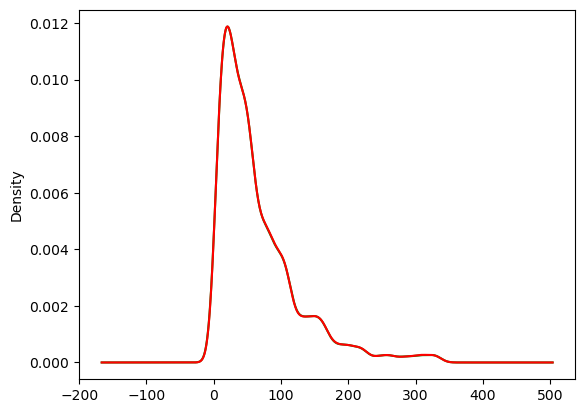

In [12]:
df_new['training_hours'].plot.density(color="green")
df['training_hours'].plot.density(color="red")

In [13]:
df[cols].columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [14]:
df_new['enrolled_university'].value_counts()

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64

In [15]:
df_new['education_level'].value_counts()

education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64

In [16]:
temp_df=pd.concat([
    df['enrolled_university'].value_counts() /len(df),
    df_new['enrolled_university'].value_counts() /len(df),
], axis=1)

In [17]:
temp_df.columns=['original', 'cca']

In [18]:
temp_df

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


# Handling Numerical Missing Values 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
data=pd.read_csv("D:\\ITM\\ML_Dataset\\titanic_toy.csv")

In [22]:
data

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [23]:
data.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [24]:
data.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [25]:
data['Fare_mean']=data['Fare'].fillna(data['Fare'].mean())
data['Fare_median']=data['Fare'].fillna(data['Fare'].median())

In [26]:
data['Age_mean']=data['Fare'].fillna(data['Age'].mean())
data['age_median']=data['Fare'].fillna(data['Age'].median())

In [27]:
data.head()

,Age,Fare,Family,Survived,Fare_mean,Fare_median,Age_mean,age_median
0,22.0,7.2500,1,0,7.2500,7.2500,7.2500,7.2500
1,38.0,71.2833,1,1,71.2833,71.2833,71.2833,71.2833
2,26.0,7.9250,0,1,7.9250,7.9250,7.9250,7.9250
3,35.0,53.1000,1,1,53.1000,53.1000,53.1000,53.1000
4,35.0,8.0500,0,0,8.0500,8.0500,8.0500,8.0500


In [28]:
data.isnull().mean()

Age            0.198653
Fare           0.050505
Family         0.000000
Survived       0.000000
Fare_mean      0.000000
Fare_median    0.000000
Age_mean       0.000000
age_median     0.000000
dtype: float64

<Axes: >

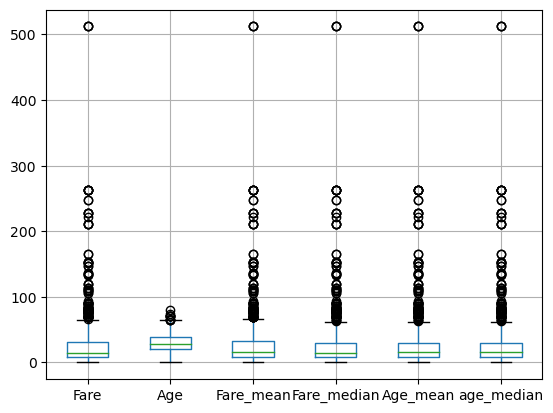

In [29]:
data[['Fare','Age','Fare_mean','Fare_median','Age_mean','age_median']].boxplot()

In [30]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [31]:
trf=ColumnTransformer([('imputer1',imputer1,['Age']),('imputer2',imputer2,['Fare'])],remainder='passthrough')

In [32]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [33]:
trf.fit(data[['Fare','Age']])

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [35]:
trf.named_transformers_['imputer2'].statistics_

array([32.2793383])

In [36]:
trf.transform(data)

array([[22.       ,  7.25     ],
       [38.       , 71.2833   ],
       [26.       ,  7.925    ],
       ...,
       [28.       , 23.45     ],
       [26.       , 32.2793383],
       [32.       ,  7.75     ]])

# Handling Categorical values

In [37]:
data1=pd.read_csv("D:\\ITM\\ML_Dataset\\customer.csv")

In [38]:
data1.head(3)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No


In [39]:
data1.isnull().sum()

age          0
gender       0
review       0
education    0
purchased    0
dtype: int64

In [40]:
new_data=data1.iloc[:,2:]

In [41]:
new_data.head(2)

,review,education,purchased
0,Average,School,No
1,Poor,UG,No


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(new_data.iloc[:,0:2],new_data.iloc[:,-1],test_size=0.2)

In [44]:
x_train.head(2)

,review,education
12,Poor,School
11,Good,UG


In [45]:
y_train

12     No
11    Yes
28     No
13     No
17    Yes
3      No
26     No
29    Yes
23     No
7     Yes
44     No
16    Yes
22    Yes
10    Yes
38     No
18     No
27     No
19    Yes
46     No
37    Yes
25     No
0      No
41    Yes
39     No
35    Yes
15     No
47    Yes
40     No
9     Yes
32    Yes
24    Yes
30     No
4      No
33    Yes
48    Yes
36    Yes
34     No
2      No
6      No
42    Yes
Name: purchased, dtype: object

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [48]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [49]:
x_train=oe.transform(x_train)


In [50]:
x_train

array([[0., 0.],
       [2., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [2., 2.],
       [0., 2.],
       [1., 1.],
       [2., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 2.],
       [2., 1.],
       [2., 0.],
       [2., 0.],
       [0., 2.],
       [0., 2.],
       [0., 2.],
       [1., 2.],
       [2., 0.],
       [1., 0.],
       [2., 2.],
       [0., 2.],
       [0., 0.],
       [0., 1.],
       [2., 2.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [1., 2.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [2., 1.],
       [1., 0.],
       [2., 2.],
       [2., 0.],
       [2., 2.]])

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
le.fit(y_train)

LabelEncoder()

In [54]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [55]:
y_train=le.transform(y_train)

In [56]:
y_train

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

# OneHOt Encoder for nominal categorical data

In [57]:
#using pandas

In [58]:
data1.head(3)

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No


In [59]:
#x=data1.iloc[:,1:2]

In [60]:
#pd.get_dummies(data1.iloc[:,1:2])

In [61]:
x_train,x_test,y_train,y_test=train_test_split(data1.iloc[:,1:2],data1.iloc[:,-1],test_size=0.2)

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
oe=OneHotEncoder()

In [64]:
oe

OneHotEncoder()

In [65]:
one=oe.fit_transform(x_train[['gender']]).toarray()

In [66]:
one

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])